In [5]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline


In [6]:
ID = 150
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

150 run on antibiasL, L is correct, R is incorrect

# Load sessions

In [7]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasL = sessions[(sessions.SessionType == 'antibiasL')]
sessions = (pd.concat([unbiased,antibiasL])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
32        150          57    unbiased
33        150          59    unbiased
34        150          66   antibiasL
35        150          70   antibiasL
36        150          74   antibiasL
37        150          78    unbiased
38        150          82    unbiased


In [8]:
summary = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals]
#Load all sessions for an animal

In [51]:
mean_trials = np.mean([(len(x))for x in summary])

In [52]:
unbiased_idx = [0,1,5,6]
antibias_idx = [2,3,4]
len(summary[0])

100

In [53]:
summary = [mvr.correctR(x) for x in summary]

# Create dot plot

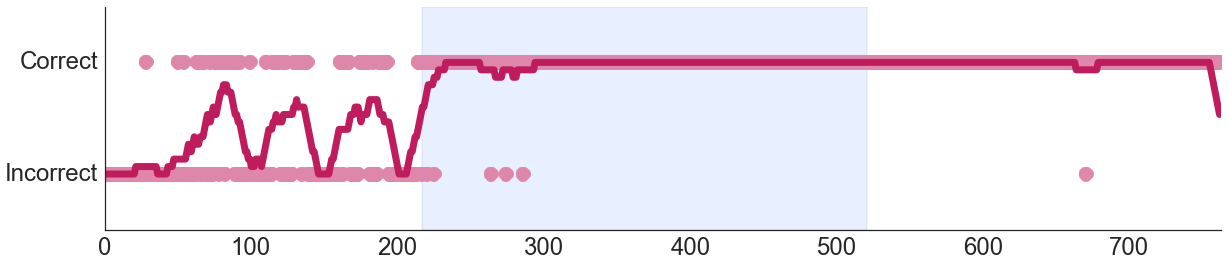

In [54]:
#Plot Correct Track Record across all sessions
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.', color=[0.87,0.53,0.67], markersize=30)
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
#[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = [0.7,0.8,1.0], alpha = 0.3)
plt.xlabel('Cumulative Trial #',fontsize = 18.0)
plt.yticks([0,1],['Incorrect','Correct'],fontsize = 24.0)
plt.xticks(fontsize=24.0)
plt.title('Multi-Session Performance - Animal 150',fontsize = 18.0)
sns.despine()

avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs, color=[0.75,0.11,0.37],linewidth=7) 
plt.savefig('150plot.eps', format='eps')

763 763


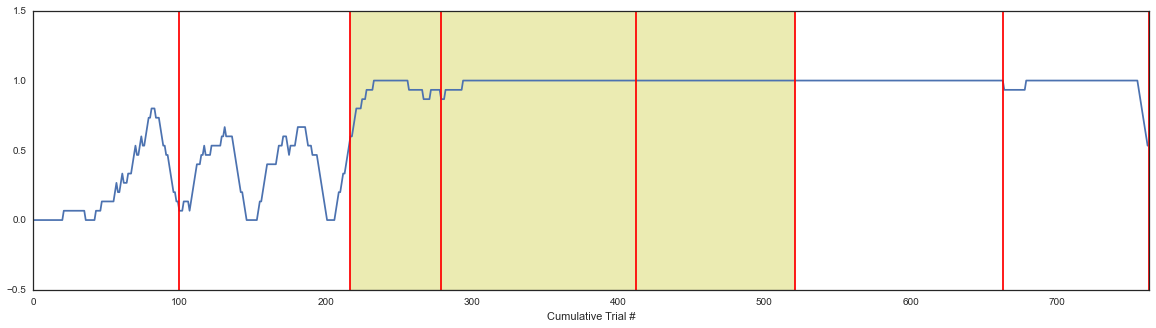

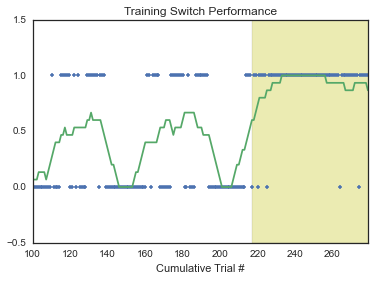

In [55]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')

print len(avgs), len(dot_array)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(dot_array,'.')
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[0],len_array[2])
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.title('Training Switch Performance')
plt.xlabel('Cumulative Trial #')

zoom = avgs[len_array[1]-40:len_array[1]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg150.csv")



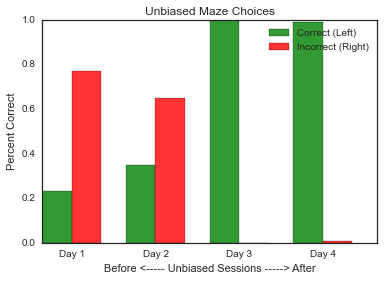

In [56]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in unbiased_idx:
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ('Day 1', 'Day 2', 'Day 3', 'Day 4')  #Unbiased days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Before <----- Unbiased Sessions -----> After')
plt.ylabel('Percent Correct')
plt.title('Unbiased Maze Choices')
plt.show()

plt.savefig(path+'/unbiased150.jpg')

# Plot Animal Performance

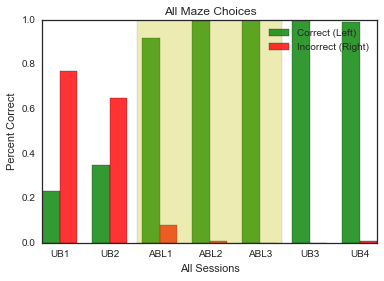

0.290213675214 0.970612013906 0.995


In [57]:
#Plot Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(7):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.show()

plt.savefig(path+'/allsessions150.jpg')

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# Time stats

[13.086600000000006, 10.571743589743587, 20.486999999999995, 8.89933834586466, 8.68451376146789, 9.566323943661972, 11.731740000000002]


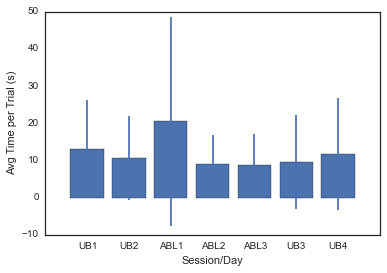

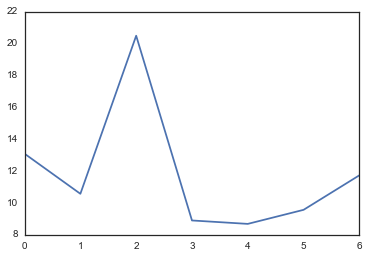

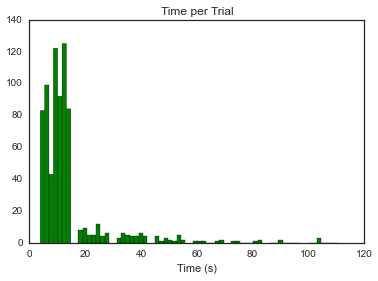

In [58]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)

labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
plt.plot(mu_time,'-')

plt.figure(3)
t = []
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[2.693859999999999, 1.9706153846153847, 3.6447096774193546, 3.363142857142857, 2.443761467889909, 2.0034225352112673, 2.0926199999999993]
[3.9343833960958543, 2.1787912254835318, 9.766724410855963, 5.657071746459359, 4.569395962388697, 4.825989495898642, 3.5185689663999953]


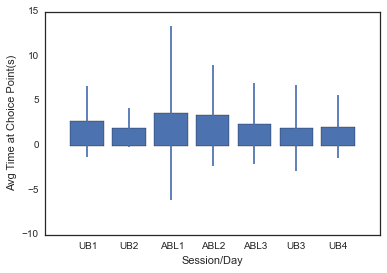

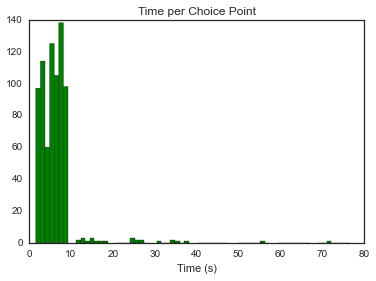

In [59]:
#Time in Choice Point
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            
            

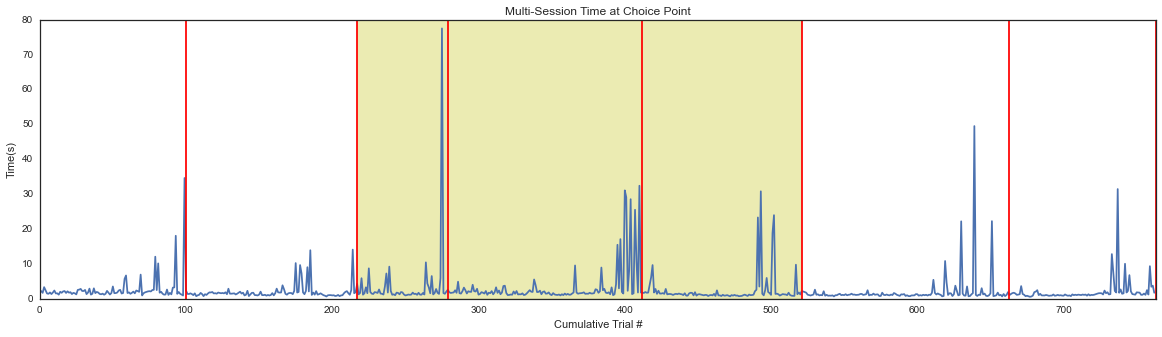

In [60]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')

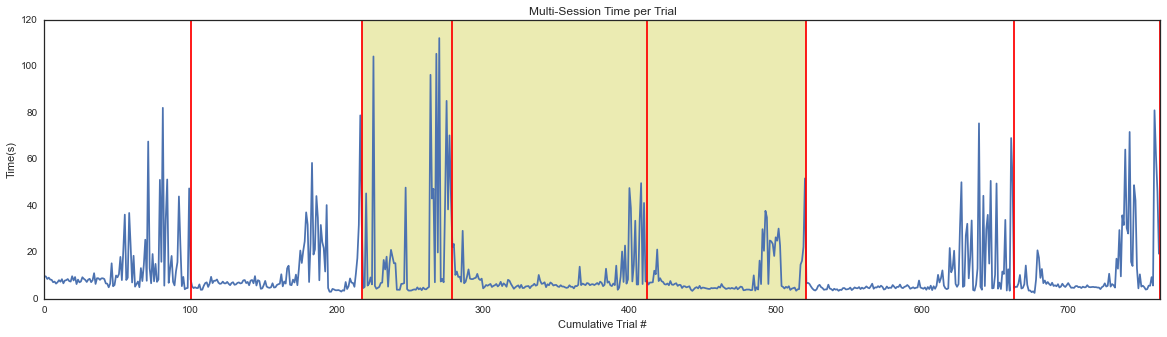

In [61]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')

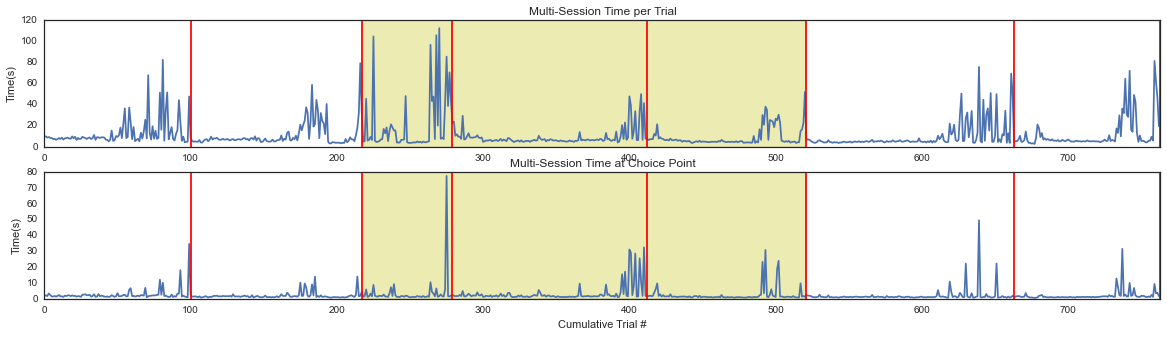

In [62]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


0


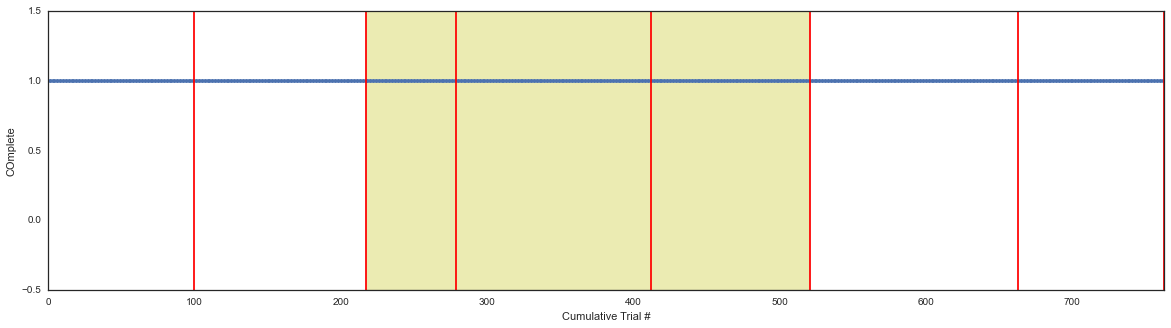

In [63]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('COmplete')

num_incomplete = completion.count(0)
print num_incomplete

In [64]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)

In [65]:
num_deadend

6

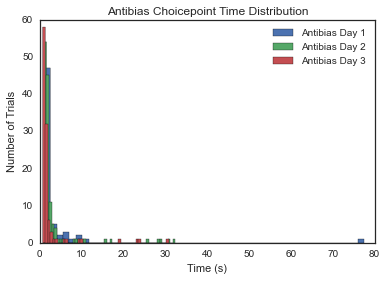

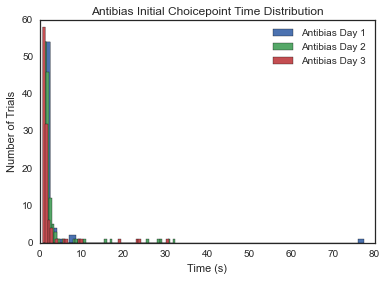

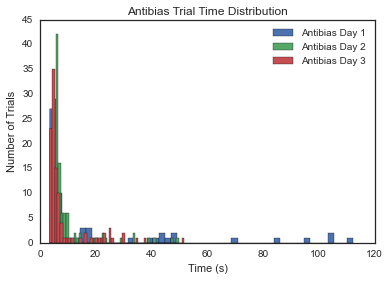

In [66]:
for i in antibias_idx:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 




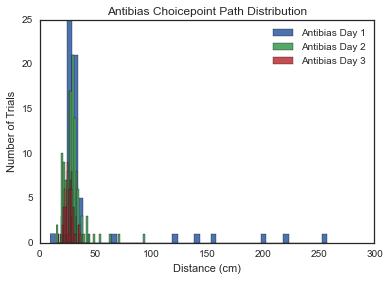

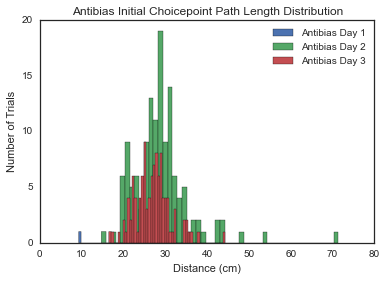

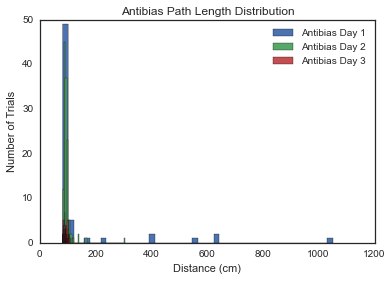

In [67]:
for i in antibias_idx:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

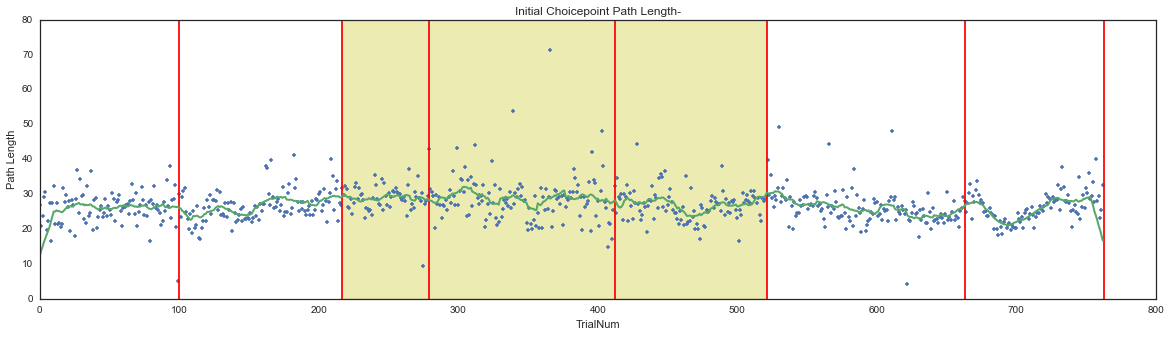

In [68]:
plt.figure(figsize = [20,5])

initpath = []
for i in range(len(summary)):
    initpath = np.append(initpath,summary[i].initChoicePath)

pathavgs = []
binsize = 20
kernel = np.ones(binsize,)/float(binsize)
pathavgs = np.convolve(initpath,kernel, 'same')
   
plt.plot(initpath,'.')
[plt.axvline(x =a, color='r') for a in len_array ]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('TrialNum')
plt.ylabel('Path Length')
plt.title('Initial Choicepoint Path Length-')
plt.plot(pathavgs,'-',linewidth = 2)
    

<type 'numpy.ndarray'>
304
[62, 133, 109]
mean = 5.29780738278
std= 11.2911047657
median= 1.19257430897


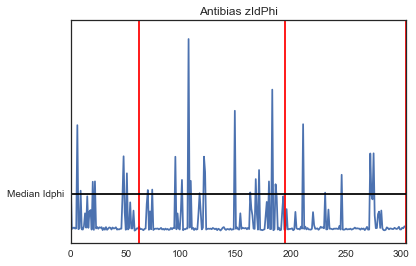

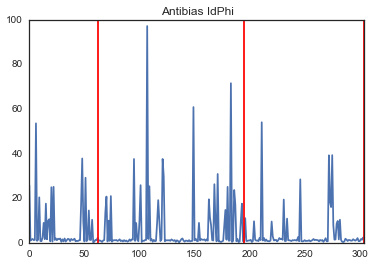

In [69]:
antibias_idphi = []
ab_array = []
print type(summary[2].IdPhi.values)
for i in antibias_idx:
    antibias_idphi = np.append(antibias_idphi,summary[i].IdPhi.values)
    ab_array.append(len(summary[i]))

print len(antibias_idphi)
zidphi_3days = ((antibias_idphi - np.nanmean(antibias_idphi))/float(np.nanstd(antibias_idphi)))
print ab_array
print "mean = "+str(np.nanmean(antibias_idphi))
print "std= " + str(np.nanstd(antibias_idphi))
print "median= " + str(np.nanmedian(antibias_idphi))
    
ab_array = list(np.cumsum(ab_array))

plt.plot(zidphi_3days)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.axhline(y=np.nanmedian(antibias_idphi),color = 'k')
plt.yticks([np.nanmedian(antibias_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(antibias_idphi)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.title('Antibias IdPhi')


[4, 3, 2]


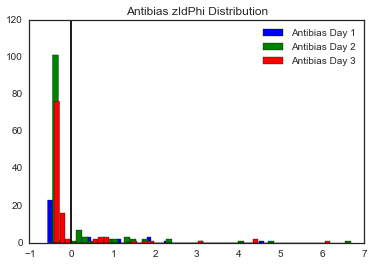

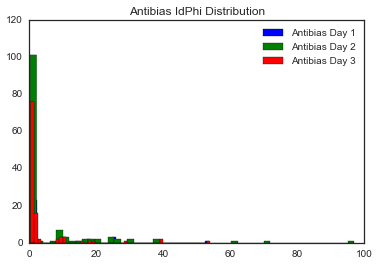

In [70]:
color = ['b','g','r']
for i in antibias_idx:
    plt.hist(summary[i].zIdPhi,50,color = color[i-2])
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.axvline(x=0,color = 'k')
plt.title('Antibias zIdPhi Distribution')
#plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].IdPhi,50,color = color[i-2])
plt.title('Antibias IdPhi Distribution')
plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])

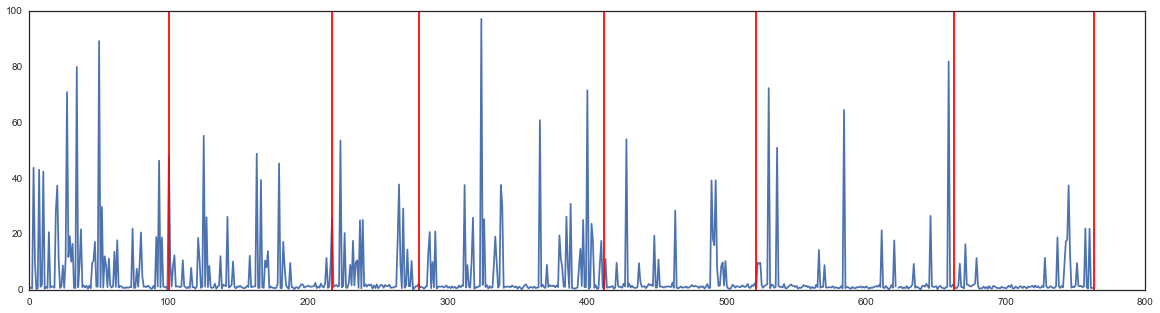

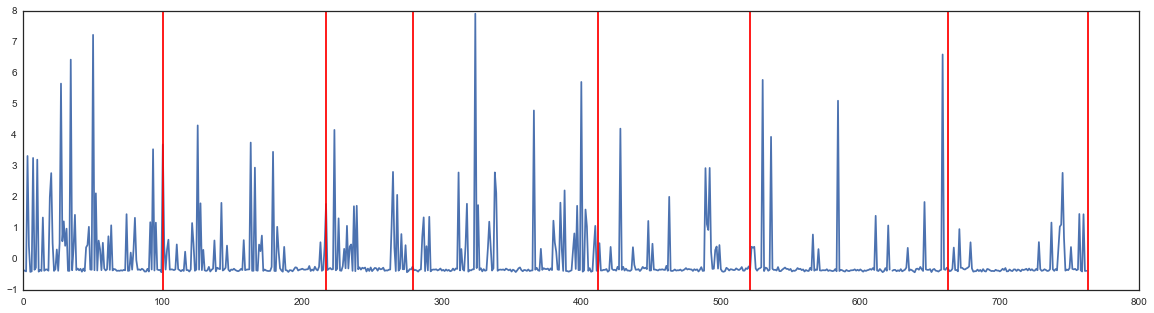

In [71]:
all_idphi = []
all_zidphi = []
for i in range(len(summary)):
    all_idphi = np.append(all_idphi,summary[i].IdPhi.values) 
    
all_zidphi = ((all_idphi - np.nanmean(all_idphi))/float(np.nanstd(all_idphi)))

plt.figure(figsize = [20,5])
plt.plot(all_idphi)
[plt.axvline(x =a, color='r') for a in len_array ]

plt.figure(figsize = [20,5])
plt.plot(all_zidphi)
[plt.axvline(x =a, color='r') for a in len_array ]
        
    

In [72]:
#Summary vals for all of an animal's sessions
animal_summary = {'Animal' :150,
                  'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoiceTime': np.nanmean(tchoice_array),
                  'meanIdPhi': np.nanmean(all_idphi),
                  'stdIdPhi' : np.nanstd(all_idphi),
                  'meanAntibiasIdPhi' : np.nanmean(antibias_idphi),
                  'stdAntibiasIdPhi' : np.nanstd(antibias_idphi),
                  'meanzIdPhi' : np.nanmean(all_zidphi),
                  'stdzIdPhi': np.nanstd(all_zidphi),
                  'meanAntibiaszIdphi' : np.nanmean(zidphi_3days),
                  'meanAntibiaszIdPhi' : np.nanstd(zidphi_3days),
                  'medianIdPhi' : np.median(all_idphi),
                  'medianzIdPhi' : np.median(all_zidphi),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctAfter' : mu_perc_corrUB_after}

In [73]:
animal_summary = pd.Series(animal_summary)

In [74]:
animal_summary.to_csv( path + "/animalsummary150.csv")

In [75]:
animal_summary

Animal                1.500000e+02
correctAfter          9.950000e-01
correctAntibias       9.706120e-01
correctBefore         2.902137e-01
incomplete            0.000000e+00
meanAntibiasIdPhi     5.297807e+00
meanAntibiaszIdPhi    1.000000e+00
meanAntibiaszIdphi    0.000000e+00
meanChoiceTime        2.533861e+00
meanIdPhi             5.189690e+00
meanNumTrials         1.090000e+02
meanTime              1.111083e+01
meanzIdPhi            1.864942e-17
medianIdPhi           1.145996e+00
medianzIdPhi         -3.478855e-01
numDays               7.000000e+00
stdAntibiasIdPhi      1.129110e+01
stdIdPhi              1.162363e+01
stdzIdPhi             1.000000e+00
totalDeadEnd          6.000000e+00
dtype: float64

# Add pro-bias session analysis

In [76]:
logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_extraswitch_log.xlsx'
extralog = pd.read_excel(logpath)
extralog

extra_sessions = extralog[(extralog.AnimalNum == 150)]
#unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = extra_sessions[(extra_sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasL,antibiasR])).sort(columns = 'SessionNum')
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
32        150          57    unbiased
33        150          59    unbiased
34        150          66   antibiasL
35        150          70   antibiasL
36        150          74   antibiasL
37        150          78    unbiased
38        150          82    unbiased
4         150          88   antibiasR
5         150          91   antibiasR


In [77]:
summary_extra = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals[-2:]]


summary_extra = [mvr.correctR(x) for x in summary_extra]
summary+=summary_extra

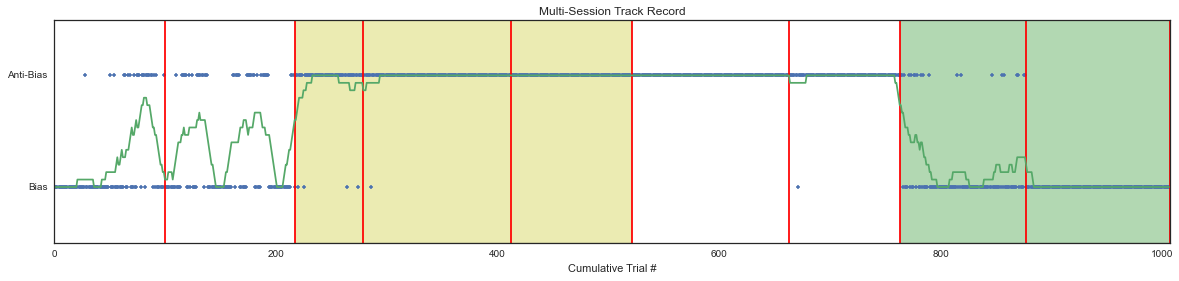

In [78]:
#Plot Correct Track Record acros all sessions (main behavior)
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[6],len_array[8], facecolor = 'g', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Bias','Anti-Bias'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

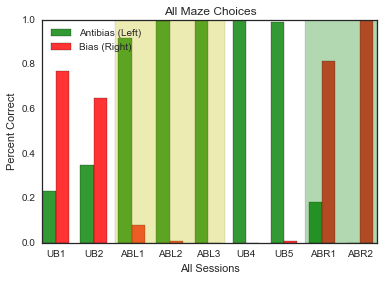

0.290213675214 0.970612013906 0.995


In [79]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(len(summary)):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2','ABL1', 'ABL2', 'ABL3', 'UB4', 'UB5', 'ABR1', 'ABR2']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Antibias (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Bias (Right)')

plt.legend( loc = 'best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.axvspan(6.9,8.8, facecolor = 'g', alpha = 0.3)
plt.show()

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# # Add switching analysis


In [80]:
extra_sessions = extralog[(extralog.AnimalNum == 150)]
switch = extra_sessions[(extra_sessions.SessionType == 'switchL20')]
sessions = (pd.concat([unbiased,antibiasL,switch])).sort(columns = 'SessionNum')
switch_sessions = (pd.concat([switch])).sort(columns = 'SessionNum')
print switch_sessions
switch_vals= [int(x) for x in switch_sessions.SessionNum]
print switch_vals

    AnimalNum  SessionNum SessionType
12        150          97   switchL20
13        150          99   switchL20
14        150         101   switchL20
[97, 99, 101]


In [90]:
prefix = []
for x in switch_vals:
    if len(str(x))==2:
        pref = '0000'
    else:
        pref ="000"
    prefix.append(pref)    

summary_switch = [pd.read_csv(path + '/'+ prefix[i] + str(switch_vals[i]) + '/summary/trial_summary' + str(switch_vals[i])+ '.csv') for i in range(len(switch_vals))]
#print summary_switch

[     number  trialType  reward  rEnd  lEnd rewardSide  Pathlengths  \
0         0          0       1     0     0          L    92.713039   
1         1          0       1     0     0          L    85.106013   
2         2          0       1     0     0          L    88.203118   
3         3          0       1     0     0          L    91.215802   
4         4          0       1     0     0          L    88.625258   
5         5          0       1     0     0          L    87.230511   
6         6          0       1     0     0          L    85.813618   
7         7          0       1     0     0          L    91.880661   
8         8          0       1     0     0          L    85.877344   
9         9          0       1     0     0          L    89.444808   
10       10          0       1     0     0          L    93.356960   
11       11          0       1     0     0          L    86.014917   
12       12          0       1     0     0          L    86.675536   
13       13        

In [91]:
def round_down(num, divisor):
    return num - (num%divisor)

In [95]:
len_array = []
for i in summary_switch:
     len_array.extend([len(i)])
line_array = list(np.cumsum(len_array))
line_array        
   
sess_lim = [round_down(x,20) for x in len_array]
sess_lim

for i in range(len(sess_lim)):
    q = summary_switch[i]
    summary_switch[i] = q.ix[0:(sess_lim[i])-1]    
    

100


In [96]:
#Classify left and Right binary
dotswitch = []
reward = []
avgs = []
binsize = 15
for i in summary_switch:
    dotswitch.extend(i.binChoice)
    reward.extend(i.trialType)
    len_array.extend([len(i)])
    
#Convolution performed on day by day basis and then concatenated
    kernel = np.ones(binsize,)/float(binsize)
    avgs.extend(np.convolve(i.binChoice,kernel, 'same'))


[0, 20, 40, 60, 80]
[100, 120, 140, 160, 180, 200, 220, 240]
[240, 260, 280, 300]


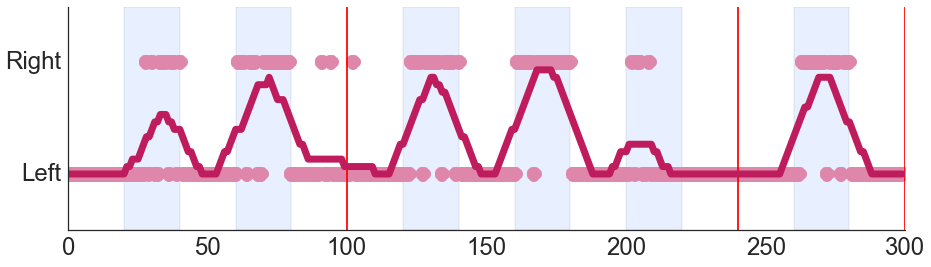

In [99]:
plt.figure(figsize = [15,4])
plt.plot(dotswitch,'.', color=[0.87,0.53,0.67], markersize=30)
plt.ylim(-0.5,1.5)
plt.xlim(0,max(line_array))
marks = np.cumsum(sess_lim)
[plt.axvline(x =a, color='r') for a in marks]
#plt.axvspan(b[1],b[2], facecolor = [0.7,0.8,1.0], alpha = 0.3)
#plt.axvspan(b[3],b[4], facecolor = [0.7,0.8,1.0], alpha = 0.3)
#plt.axvspan(b[5],b[6], facecolor = [0.7,0.8,1.0], alpha = 0.3)
#plt.xlabel('Cumulative Trial #',fontsize = 18.0)
plt.yticks([0,1],['Left','Right'],fontsize = 24.0)
plt.xticks(fontsize=24.0)
plt.title('Multi-Session Switch Performance - Animal 150',fontsize = 18.0)
sns.despine()
plt.plot(avgs, color=[0.75,0.11,0.37],linewidth=7)


m = max(marks)
spans = range(0,m,20)
spans.append(m)

for r in range(len(marks)):
    if r==0:
        spans = range(0,marks[r],20)
    else:    
        spans = range(marks[r-1],marks[r],20)
        spans.append(marks[r])

    print spans
    for s in range(len(spans)):          
        if s%2==1 and s!=len(spans)-1:
            plt.axvspan(spans[s], spans[s+1],facecolor = [0.7,0.8,1.0], alpha = 0.3)
    

plt.savefig('150switch.eps', format='eps')
#plt.plot(reward)

[0.575, 0.6, 0.75] [0.95, 0.9625, 0.975]


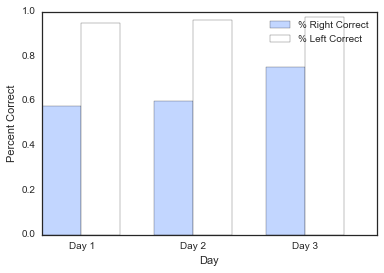

In [100]:
perc_right =[]
perc_left = []
for i in summary_switch:
    right = i[i.trialType==1]
    left = i[i.trialType==0]
    #print len(right), len(left)
    perc_right.append(len(right[right.initChoice==right.rewardSide])/float(len(right)))
    perc_left.append(len(left[left.initChoice==left.rewardSide])/float(len(left)))
    
print perc_right, perc_left         



labels = ('Day 1', 'Day 2', 'Day 3')  #Unbiased days
y_pos = np.arange(len(labels))
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, perc_right, bar_width,
                 alpha=opacity,
                 color=[0.7,0.8,1.0],
                 label= '% Right Correct')
 
rects2 = plt.bar(y_pos + bar_width, perc_left, bar_width,
                 alpha=opacity,
                 color='w',
                 label= '% Left Correct')

plt.legend(loc='best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Day')
plt.ylabel('Percent Correct')
#plt.title('')
plt.show()

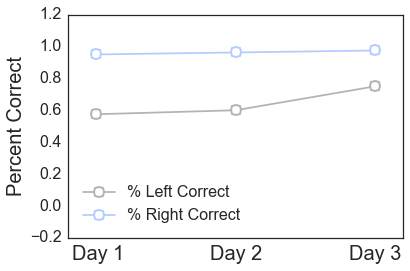

In [109]:
clrs = [[0.7,0.8,1.0], [0.9,0.9,0.9]]
plt.plot(perc_right,
          marker='o', 
          mfc = 'w',
          markeredgecolor= [0.7,0.7,0.7],
          markeredgewidth=2.0,
          markersize = 10.0, 
          color = [0.7,0.7,0.7],
          label= "% Left Correct")
plt.plot(perc_left,
          marker='o', 
          mfc = 'w',
          markeredgecolor= [0.7,0.8,1.0],
          markeredgewidth=2.0,
          markersize = 10.0, 
          color = [0.7,0.8,1.0], 
          label= "% Right Correct")

plt.xlabel('Day')
plt.ylabel('Percent Correct', fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(-0.2,2.2)
plt.ylim(-0.2,1.2)
plt.xticks(y_pos, labels, fontsize=20)
plt.legend(loc='best', fontsize=16)
plt.savefig('150swperf.eps', format='eps')